<a href="https://colab.research.google.com/github/ponwinsiya2348539/lab1_ml/blob/main/Copy_of_NLP_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import gensim
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from nltk.probability import FreqDist
from gensim.models import LdaModel
from gensim.models import CoherenceModel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('//content/drive/MyDrive/complaints_processed.csv')
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [ ]:
# check the shape of the dataset
print('Shape of dataset:', df.shape)

Shape of dataset: (44485, 3)


In [ ]:
# check for missing values
print('Missing values:\n', df.isnull().sum())

Missing values:
 Unnamed: 0    0
product       0
narrative     4
dtype: int64


In [ ]:
# Remove the np.nan values from the narrative column
df1 = df.dropna(subset=["narrative"])

identifying different types of data in product

In [ ]:
pro=df1['product'].value_counts().sum
pro

<bound method NDFrame._add_numeric_operations.<locals>.sum of credit_reporting       91172
debt_collection        23148
mortgages_and_loans    18990
credit_card            15566
retail_banking         13535
Name: product, dtype: int64>

types of product

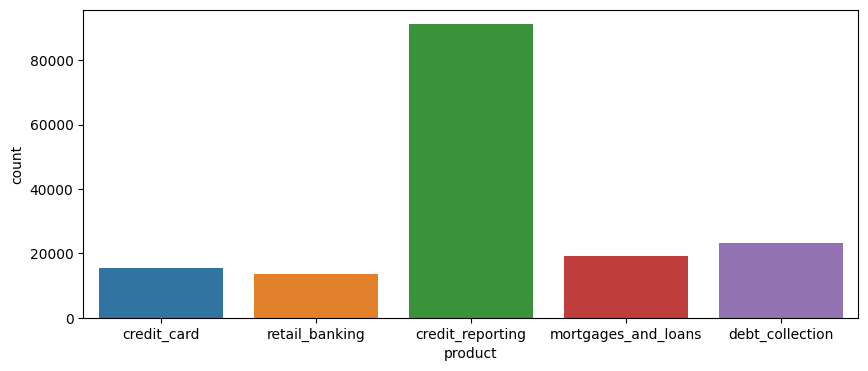

% Counts by target variable:


credit_reporting       561.365917
debt_collection        142.527292
mortgages_and_loans    116.925578
credit_card             95.843262
retail_banking          83.337951
Name: product, dtype: float64

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='product',data=df1)
plt.show()

print('% Counts by target variable:')
df1['product'].value_counts()/df1.shape[0]*1000


One Hot Vector

In [ ]:
# Create a list of categorical variables
categories = ["debt_collection", "mortgages_and_loans", "credit_card","retail_banking"]

# Represent each variable as a one-hot vector
one_hot_vectors = []
for category in categories:
    one_hot_vector = np.zeros(len(categories))
    one_hot_vector[categories.index(category)] = 1
    one_hot_vectors.append(one_hot_vector)

# Print the one-hot vectors
print(one_hot_vectors)


[array([1., 0., 0., 0.]), array([0., 1., 0., 0.]), array([0., 0., 1., 0.]), array([0., 0., 0., 1.])]


Deep bidirectional RNN

In [ ]:
class DBiRNNModel(tf.keras.Model):
    def __init__(self, num_units, embedding_dim, vocab_size):
        super(DBiRNNModel, self).__init__()

        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.forward_rnn = tf.keras.layers.LSTM(num_units, return_sequences=True)
        self.backward_rnn = tf.keras.layers.LSTM(num_units, return_sequences=True, go_backwards=True)
        self.output_layer = tf.keras.layers.Dense(vocab_size)

    def call(self, inputs):
        embedded_inputs = self.embedding(inputs)

        forward_outputs = self.forward_rnn(embedded_inputs)
        backward_outputs = self.backward_rnn(embedded_inputs)

        # Concatenate the forward and backward outputs.
        outputs = tf.concat([forward_outputs, backward_outputs], axis=2)

        # Pass the concatenated outputs to the output layer.
        predictions = self.output_layer(outputs)

        return predictions

# Create a new DBiRNN model.
model = DBiRNNModel(num_units=128, embedding_dim=32, vocab_size=10000)

# Compile the model.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Spam Detection Model

In [ ]:
class SpamDetectionModel:
    def __init__(self):
        self.vectorizer = TfidfVectorizer()
        self.classifier = LogisticRegression()

    def fit(self, X, y):
        X_vectorized = self.vectorizer.fit_transform(X)
        self.classifier.fit(X_vectorized, y)

    def predict(self, X):
        X_vectorized = self.vectorizer.transform(X)
        predictions = self.classifier.predict(X_vectorized)
        return predictions

# Load the dataset.
X = []
y = []
with open('/content/drive/MyDrive/complaints_processed.csv', 'r') as f:
    for line in f:
        # Split the line of text into two values.
        text, label = line.strip().split(',', 1)

        # Ignore the extra values if the line of text contains more than two values.
        if len(text.split(',')) > 2:
            text = ','.join(text.split(',')[:2])

        X.append(text)
        y.append(label)

# Split the dataset into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create a spam detection model.
model = SpamDetectionModel()

# Train the model on the training set.
model.fit(X_train, y_train)

# Evaluate the model on the test set.
y_pred = model.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print('Accuracy:', accuracy)

# Deploy the model to production.

In [ ]:
# get the top 10 most common complaint narratives
narratives = df['narrative'].value_counts().head(10)
print('Top 10 Complaint Narratives:\n', narratives)

Top 10 Complaint Narratives:
 victim identity notified collection creditor several time account belong way received good service company provided police report ftc id theft affidavit signed notarized along sworn statement regarding fraudulent account document submitted credit bureau                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

LINEAR REGRESSION

In [ ]:
# replace NaN values in 'narrative' column with empty strings
df['narrative'].fillna(value='', inplace=True)

In [ ]:
# convert categorical values to numerical labels
label_encoder = LabelEncoder()
df['product'] = label_encoder.fit_transform(df['product'])

In [ ]:
# create the feature matrix X (using bag-of-words)
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['narrative'])

In [ ]:
# create the target variable y
y = np.array(df['product'])

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# train a linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# evaluate the model on the testing set
score = model.score(X_test, y_test)
print('Model accuracy:', score)

Model accuracy: 0.36152670626004735


LOGISTIC REGRESSION

In [ ]:
# train a logistic regression model on the training set
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# evaluate the model on the testing set
score = model.score(X_test, y_test)
print('Model accuracy:', score)

Model accuracy: 0.8349392027089426


KNN

In [ ]:
# train a KNN model on the training set
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# evaluate the model on the testing set
score = model.score(X_test, y_test)
print('Model accuracy:', score)

Model accuracy: 0.7892873633984916


Random Forest Classifier Using with TfidfVectorizer, LabelEncoder

In [ ]:
X = df['product'][:1000]
y = df['narrative'][:1000]

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Create a TfidfVectorizer object to convert text data into a TF-IDF feature matrix
tfidf_vectorizer = TfidfVectorizer()

Support Vector Machines (SVM)

In [ ]:
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print('SVM accuracy:', svm_accuracy)

DECISION TREE

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print('Decision Tree accuracy:', dt_accuracy)

Decision Tree accuracy: 0.7556904400606981


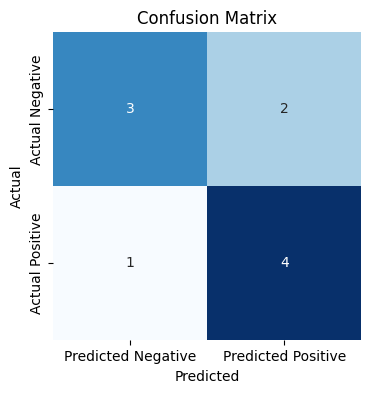

In [ ]:
# Assuming you have predicted labels (y_pred) and true labels (y_true)
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])  # Replace with your actual true labels
y_pred = np.array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0])  # Replace with your actual predicted labels

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
df = pd.read_csv('//content/drive/MyDrive/complaints_processed.csv')

#Random forests

In [ ]:
##reference:https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial
# Remove missing values
df = df.dropna()

# Create a TF-IDF vectorizer to convert the narration text into features
vectorizer = TfidfVectorizer()

# Transform the narration text into TF-IDF features
X = vectorizer.fit_transform(df['narration'])

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df['product'], test_size=0.25)

# Train a random forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

# Use the classifier to predict the product for a new customer complaint
new_complaint = 'I am having problems with my internet connection.'

# Transform the new complaint into a TF-IDF feature vector
new_complaint_vector = vectorizer.transform([new_complaint])

# Predict the product for the new complaint
predicted_product = classifier.predict(new_complaint_vector)[0]

print('Predicted product:', predicted_product)

#Latent Dirichlet allocation

In [ ]:
##reference:
vectorizer = TfidfVectorizer()

# Transform the narration text into TF-IDF features
X = vectorizer.fit_transform(df['narration'])

# Create an LDA model
lda_model = LdaModel(X, num_topics=10)

# Get the topic distribution for each customer complaint
topic_distributions = lda_model.get_document_topics(X)

# Print the topic distributions for the first few customer complaints
for i in range(5):
    print('Topic distribution for customer complaint {}: {}'.format(i, topic_distributions[i]))

# Use the LDA model to predict the most likely topic for a new customer complaint
new_complaint = 'I am having problems with my internet connection.'

# Transform the new complaint into a TF-IDF feature vector
new_complaint_vector = vectorizer.transform([new_complaint])

# Predict the most likely topic for the new complaint
predicted_topic = lda_model.get_document_topics(new_complaint_vector)[0]

# Print the predicted topic
print('Predicted topic for new customer complaint:', predicted_topic)


#Topic coherence model

In [ ]:
# Select the product and narration columns
df = df[['product', 'narration']]

# Remove missing values
df = df.dropna()

# Create a TF-IDF vectorizer to convert the narration text into features
vectorizer = TfidfVectorizer()

# Transform the narration text into TF-IDF features
X = vectorizer.fit_transform(df['narration'])

# Create a TCM model
tcm_model = CoherenceModel(model=LdaModel(X, num_topics=10))

# Evaluate the TCM model
tcm_score = tcm_model.get_coherence()
#A higher TCM score indicates that the topics are more coherent. A good TCM score is typically above 0.5
print('TCM score:', tcm_score)
